In [51]:
%matplotlib inline  
import pandas as pd #data manipulation
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #plot
from sklearn.tree import DecisionTreeRegressor #sklearn 機器學習套件
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf  #幫我們抓取分析資料
import datetime #時間套件
#安裝套件指令
#!pip install yfinance 
#!pip install datetime 
#!pip install sklearn

##自由發揮題：應用機器學習於股價趨勢預測

* 題目動機：機器學習為人工智慧的範疇，其應用層面不斷擴大，也包括了金融投資領域。由於，股票交易乃是許多投資人理財的重要工具，因此股票價格預測長期以來一直是個對所有股票投資者極具吸引力的問題。

* 應用範圍：運用課堂所教之numpy, pandas套件幫助我們做價格資料整理、分析；同時，會運用到Array陣列資料結構來讓我們資料運算更方便，特別是大資料能讓我們以「批次」的方式，快速地進行處理。最後，會利用matplotlib套件做資料視覺化，讓結果變得淺顯易懂。

* 目的：實證機器學習演算法於股價趨勢預測上的可行性,期望此預測模式能成為投資的參考指標。此題目將運用決策樹(Decision Tree)機器學習演算法。
* 標的：台積電 2330.TW（日資料）  
訓練模型中的價格預測部分我們會使用調整後股價，而不是使用收盤價，因為，股票會經過除權、除息或分割，調整後股價才能反映真實的淨股價漲跌。

* 分析區間：2022/01/01-2022/07/01  

* 撰寫思路：分為以下9大步驟
1.  設定預測目標 (預測未來x天的股價趨勢)
2.  蒐集資料數據 
3.  選擇 A.I. 模型 (Decision Tree)
4.  決定你的預測目標 
5.  整理 A.I. 的學習資料庫，特徵指標
6.  把資料切成訓練集跟測試集
7.  讓 A.I. 學習（設定基礎參數，開始讓 A.I. 進行學習，然後生出一個模型）
8.  讓 A.I. 測驗（實際給 A.I. 一批它沒看過的資料，看看結果如何）
9.  預測結果視覺化

[*********************100%***********************]  1 of 1 completed


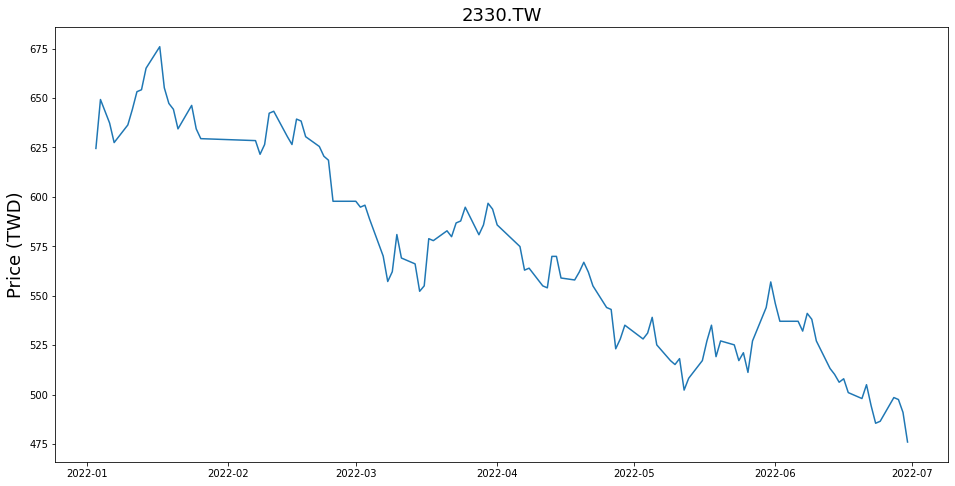

In [19]:
#get data
df = yf.download('2330.TW',
                start=datetime.datetime(2022, 1, 1),
                end=datetime.datetime(2022, 7, 1))

#看一下價格走勢
plt.figure(figsize=(16,8))
plt.title('2330.TW', fontsize = 18)
plt.ylabel('Price (TWD)', fontsize = 18)
plt.plot(df['Adj Close'])
plt.show()

In [24]:
#設定我們想要預測未來x天的股價趨勢
future_days = 20 #天
#Create a new column (the target) shifted 'x' days up
df['Prediction'] = df[['Adj Close']].shift(-future_days)

In [25]:
#Create the Training dataset
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
 
#Create the target data 
y = np.array(df['Prediction'])[:-future_days]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [26]:
#Split the data into 70% 學習樣本 | 30% 測試樣本
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [47]:
#Decision Tree Regressor model 建模
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [48]:
#use this dataset to test the models and see how well they perform
x_future = df.drop(['Prediction'], 1)[:-future_days]

#要預測的期間
x_future = x_future.tail(future_days) 
#轉成 array
x_future = np.array(x_future)

#model tree prediction 預測結果
tree_prediction = tree.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


### 將價格預測結果可視化。  
* Train 藍線：標的訓練期間價格  
* Val 橘線：標的(測試期間)的實際價格
* Prediction 綠線：預測的標的(測試期間)價格

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


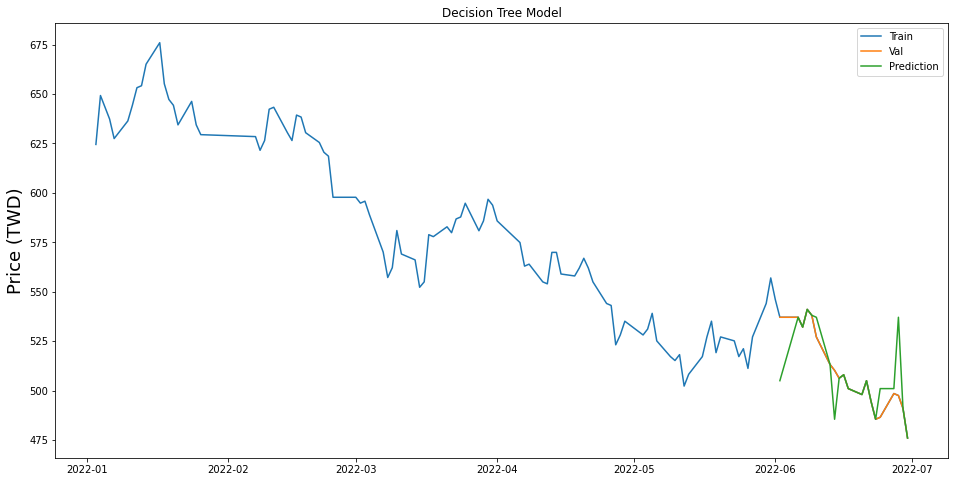

In [49]:
#將預測結果可視化呈現
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Column 'Predictions' will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.ylabel('Price (TWD)',fontsize=18)
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='upper right') #標籤
plt.show()

### 結論
我們可以看到價格預測結果還有許多改善空間。
以下幾點是我認為未來能改善的點：
* 加入 Validation set 驗證集，用這份數據優化 A.I. 模型的參數設定。
* 決策樹有個問題是容易過度擬合，而控制「深度」或許就能有效防止這個問題。因此，未來將嘗試解決模型容易『過度擬合』的問題，期望能改善預測結果。
* 除了價量資料，我們可以加入一些技術指標讓模型做訓練。
* 隨著網路科技的發達，投資人可以接觸到許多財金新聞，並看到某些新聞上的關鍵字詞，進而直接影響投資人的買賣決策。因此，希望之後能找到市場情緒指標並加入我們機器學習模型的訓練指標。